# Heart Disease Prediction

Authors: Anna Nandar, Brian Chang, Celine Habashy, Yeji Sohn


## Summary

In this project, we developed a classification system using Logistic Regression and Decision Tree models to predict heart disease diagnosis based on multiple features such as age, blood pressure, cholesterol, and more. The data was sourced from the UCI Heart Disease dataset, and preprocessing involved cleaning, transforming, and encoding categorical variables for analysis. According to our experiments, the logistic regression model achieved the high accuracy 82%. Decision Tree provided competitive results but lacked the interpretability of logistic regression. The results suggest that machine learning models can be used to predict heart disease effectively, aiding healthcare providers in early detection and intervention.

## Introduction

Heart disease is one of the leading causes of death worldwide, and early detection is crucial for improving treatment outcomes and patient survival rates. Timely diagnosis can help healthcare providers make more informed decisions, allocate resources more effectively, and ultimately save lives. Traditional diagnostic methods often involve manual interpretation of clinical test results, which can be time-consuming, subjective, and prone to errors. As health data becomes increasingly available, machine learning has emerged as a powerful tool for diagnosing and predicting diseases, including heart disease.

This project explores the application of machine learning models to classify individuals based on their likelihood of having heart disease using clinical data. Specifically, we use the UCI Heart Disease dataset, which contains medical records of patients, including features such as age, chest pain type, blood pressure, cholesterol levels, and other relevant clinical attributes. The dataset also includes a binary diagnosis label indicating the presence or absence of heart disease, which forms the basis for predictive modeling.

For this analysis, we focus on the Heart Disease dataset, which includes 13 features. These features represent key clinical indicators used to assess cardiovascular health, and the target variable categorically indicates the presence or absence of heart disease. For the purpose of this analysis, we focus on a binary classification problem, where we aim to distinguish between individuals with no heart disease and those with some form of heart disease. Additionally, the dataset has been anonymized to protect patient privacy, with identifiers such as names and social security numbers replaced by anonymous values.

The main questions addressed in this analysis are:

1. What is the overall accuracy of a classification model for heart disease prediction?
2. Which features are most predictive of the presence of heart disease?

By applying machine learning to this dataset, we aim to demonstrate how predictive modeling can aid in the early diagnosis of heart disease, providing more accurate and timely insights that could improve healthcare outcomes and resource allocation.

## About Data

The dataset used in this project is UCI Heart Disease dataset consisting of 303 patients records (https://archive.ics.uci.edu/dataset/45/heart+disease). The dataset is anonymized to protect patient privacy and includes 13 features that provide valuable insights into an individual's health status.

##### `Key Features:`

1. age: The age of the patient in years.
2. sex: The gender of the patient (1 = male, 0 = female).
3. chest_pain_type: Indicates the type of chest pain experienced, categorized as:
    - 0: Typical angina
    - 1: Atypical angina
    - 2: Non-anginal pain
    - 3: Asymptomatic
4. resting_blood_pressure: The patient’s resting blood pressure in mmHg.
5. cholesterol: Serum cholesterol levels in mg/dL.
6. fasting_blood_sugar: A binary feature indicating if fasting blood sugar is > 120 mg/dL (1 = true, 0 = false).
7. rest_ecg: Resting electrocardiogram results, coded as:
    - 0: Normal
    - 1: Having ST-T wave abnormality
    - 2: Showing probable or definite left ventricular hypertrophy.
8. max_heart_rate: Maximum heart rate achieved during exercise.
9. exercise_induced_angina: A binary feature indicating the presence of exercise-induced angina (1 = yes, 0 = no).
10. st_depression: ST depression induced by exercise relative to rest.
11. slope: The slope of the peak exercise ST segment:
    - 0: Upsloping
    - 1: Flat
    - 2: Downsloping.
12. num_of_vessels: The number of major vessels (0–3) colored by fluoroscopy.
13. thalassemia: A categorical feature representing a blood disorder:
    - 0: Normal
    - 1: Fixed defect
    - 2: Reversible defect.
14. diagnosis: The target variable, indicating the presence or absence of heart disease:
    - 0: No heart disease
    - 1: Heart disease (aggregated from severity levels 1–4 in the original dataset).

In [1]:
### Deep Check 
#pip install deepchecks

### Data Processing

In [2]:
import numpy as np
import pandas as pd
import warnings
import pandera as pa
from pandera import Column, Check, DataFrameSchema


from deepchecks.tabular import Dataset
from deepchecks.tabular.checks import FeatureLabelCorrelation

warnings.filterwarnings('ignore')

In [3]:
# Retrieve the data from the ucimlrepo
from ucimlrepo import fetch_ucirepo 

heart_disease = fetch_ucirepo(id=45)

X = heart_disease.data.features  
y = heart_disease.data.targets   

data = X.copy()
data['Diagnosis'] = y  

print("Dataset Shape:", data.shape)
print("Columns:", data.columns)

# Save the raw 

data.to_csv("../data/raw/raw_heart_disease_data.csv", index=False)

Dataset Shape: (303, 14)
Columns: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'Diagnosis'],
      dtype='object')


In [4]:
df = pd.read_csv("../data/raw/raw_heart_disease_data.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Diagnosis
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [5]:
# Rename column names to be human readable

new_column_names = ["age", "sex", "chest_pain_type", "resting_blood_pressure", "cholesterol", "fasting_blood_sugar", 
                "rest_ecg", "max_heart_rate", "exercise_induced_angina", "st_depression", "slope", 
               "num_of_vessels", "thalassemia", "diagnosis"]


df.columns = new_column_names

#### Data Validation

In [8]:
# 7. No Outlier or Anamalous Values 

# Schema to check for numerical value ranges
numerical_schema = pa.DataFrameSchema(
    {
        "age": Column(int, Check.between(0, 120), nullable=True),
        "resting_blood_pressure": Column(int, Check.between(70, 200), nullable=True),
        "cholesterol": Column(int, Check.between(100, 600), nullable=True),
        "max_heart_rate": Column(int, Check.between(60, 220), nullable=True),
    }
)


In [51]:
# checking numerical value ranges
try:
    numerical_schema.validate(df)
    print("Validation passed: No outliers found.")
except pa.errors.SchemaError as e:
    print(f"Validation failed: {e}")

Validation passed: No outliers found.


In [11]:
# Check datatypes

df.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate               int64
exercise_induced_angina      int64
st_depression              float64
slope                        int64
num_of_vessels             float64
thalassemia                float64
diagnosis                    int64
dtype: object

In [12]:
df['st_depression'].unique()

array([2.3, 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 3.1, 0.4, 1.3, 0. , 0.5,
       1.6, 1. , 1.2, 0.2, 1.8, 3.2, 2.4, 2. , 2.5, 2.2, 2.8, 3. , 3.4,
       6.2, 4. , 5.6, 2.9, 0.1, 2.1, 1.9, 4.2, 0.9, 1.1, 3.8, 0.7, 0.3,
       4.4])

## Checking the unique values for each column

In [13]:
df['num_of_vessels'].unique()

array([ 0.,  3.,  2.,  1., nan])

In [14]:
df['sex'].unique()

array([1, 0])

In [15]:
df['chest_pain_type'].unique()

array([1, 4, 3, 2])

In [16]:
df['fasting_blood_sugar'].unique()

array([1, 0])

In [17]:
df['rest_ecg'].unique()

array([2, 0, 1])

In [18]:
df['thalassemia'].unique()

array([ 6.,  3.,  7., nan])

## Map the values with the provided labels

In [19]:
df.loc[(df['chest_pain_type'] == 1), 'chest_pain_type'] = 'typical angina'
df.loc[(df['chest_pain_type'] == 2), 'chest_pain_type'] = 'atypical angina'
df.loc[(df['chest_pain_type'] == 3), 'chest_pain_type'] = 'non-anginal pain'
df.loc[(df['chest_pain_type'] == 4), 'chest_pain_type'] = 'asymptomatic'

In [20]:
df.loc[(df['fasting_blood_sugar'] == 'yes'), 'fasting_blood_sugar'] = 1
df.loc[(df['fasting_blood_sugar'] == 'no'), 'fasting_blood_sugar'] = 0

In [21]:
df.loc[(df['rest_ecg'] == 0), 'rest_ecg'] = 'normal'
df.loc[(df['rest_ecg'] == 1), 'rest_ecg'] = 'ST-T wave abnormality'
df.loc[(df['rest_ecg'] == 2), 'rest_ecg'] = 'left ventricular hypertrophy'

In [22]:
df.loc[(df['exercise_induced_angina'] == 0), 'exercise_induced_angina'] = 'no'
df.loc[(df['exercise_induced_angina'] == 1), 'exercise_induced_angina'] = 'yes'

In [23]:
df.loc[(df['slope'] == 1), 'slope'] = 'upsloping'
df.loc[(df['slope'] == 2), 'slope'] = 'flat'
df.loc[(df['slope'] == 3), 'slope'] = 'downsloping'

In [24]:
df.loc[(df['thalassemia'] == 3.), 'thalassemia'] = 'normal'
df.loc[(df['thalassemia'] == 6.), 'thalassemia'] = 'fixed defect'
df.loc[(df['thalassemia'] == 7.), 'thalassemia'] = 'reversable defect'

In [25]:
df.loc[(df['diagnosis'] == 2), 'diagnosis'] = 1
df.loc[(df['diagnosis'] == 3), 'diagnosis'] = 1
df.loc[(df['diagnosis'] == 4), 'diagnosis'] = 1

In [26]:
df

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,slope,num_of_vessels,thalassemia,diagnosis
0,63,1,typical angina,145,233,1,left ventricular hypertrophy,150,no,2.3,downsloping,0.0,fixed defect,0
1,67,1,asymptomatic,160,286,0,left ventricular hypertrophy,108,yes,1.5,flat,3.0,normal,1
2,67,1,asymptomatic,120,229,0,left ventricular hypertrophy,129,yes,2.6,flat,2.0,reversable defect,1
3,37,1,non-anginal pain,130,250,0,normal,187,no,3.5,downsloping,0.0,normal,0
4,41,0,atypical angina,130,204,0,left ventricular hypertrophy,172,no,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical angina,110,264,0,normal,132,no,1.2,flat,0.0,reversable defect,1
299,68,1,asymptomatic,144,193,1,normal,141,no,3.4,flat,2.0,reversable defect,1
300,57,1,asymptomatic,130,131,0,normal,115,yes,1.2,flat,1.0,reversable defect,1
301,57,0,atypical angina,130,236,0,left ventricular hypertrophy,174,no,0.0,flat,1.0,normal,1


### Checking and removing null values

In [27]:
df.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate             0
exercise_induced_angina    0
st_depression              0
slope                      0
num_of_vessels             4
thalassemia                2
diagnosis                  0
dtype: int64

In [28]:
df = df.dropna()

In [29]:
df.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate             0
exercise_induced_angina    0
st_depression              0
slope                      0
num_of_vessels             0
thalassemia                0
diagnosis                  0
dtype: int64

## Save the processed data to be further used

In [24]:
df.to_csv("../data/processed/processed_heart_disease_data.csv", index=False)

### EDA

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('../data/processed/processed_heart_disease_data.csv')

In [27]:
# In this section we will look at some of the features in detail
# Summary statistics for numerical features
print('\nSummary Statistics:')
print(df.describe())


Summary Statistics:
              age         sex  resting_blood_pressure  cholesterol  \
count  297.000000  297.000000              297.000000   297.000000   
mean    54.542088    0.676768              131.693603   247.350168   
std      9.049736    0.468500               17.762806    51.997583   
min     29.000000    0.000000               94.000000   126.000000   
25%     48.000000    0.000000              120.000000   211.000000   
50%     56.000000    1.000000              130.000000   243.000000   
75%     61.000000    1.000000              140.000000   276.000000   
max     77.000000    1.000000              200.000000   564.000000   

       fasting_blood_sugar  max_heart_rate  st_depression  num_of_vessels  \
count           297.000000      297.000000     297.000000      297.000000   
mean              0.144781      149.599327       1.055556        0.676768   
std               0.352474       22.941562       1.166123        0.938965   
min               0.000000       71.0000

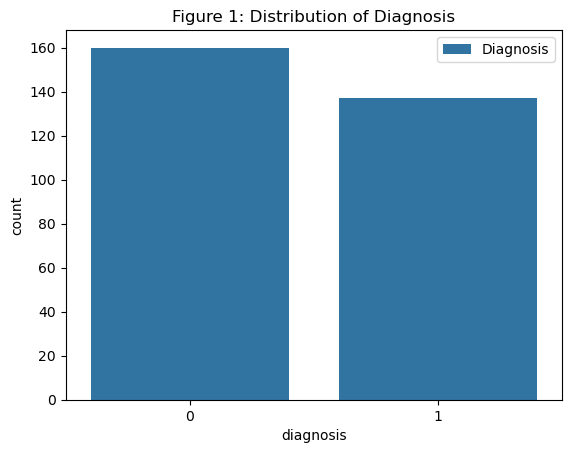

In [28]:
# Visualizing the distribution of the target variable
sns.countplot(x='diagnosis', data=df)
plt.title('Figure 1: Distribution of Diagnosis')
plt.legend(['Diagnosis'], loc='upper right')
plt.show()

In [29]:
numeric_data = df.select_dtypes(include=['number'])

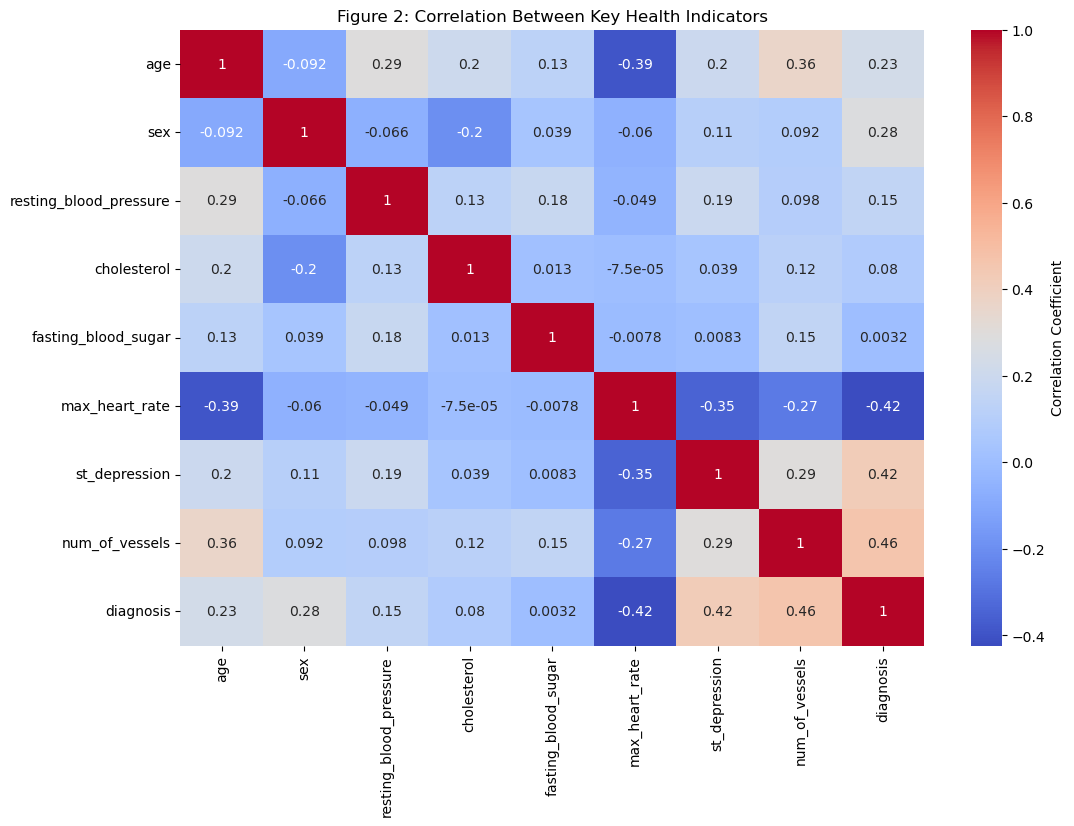

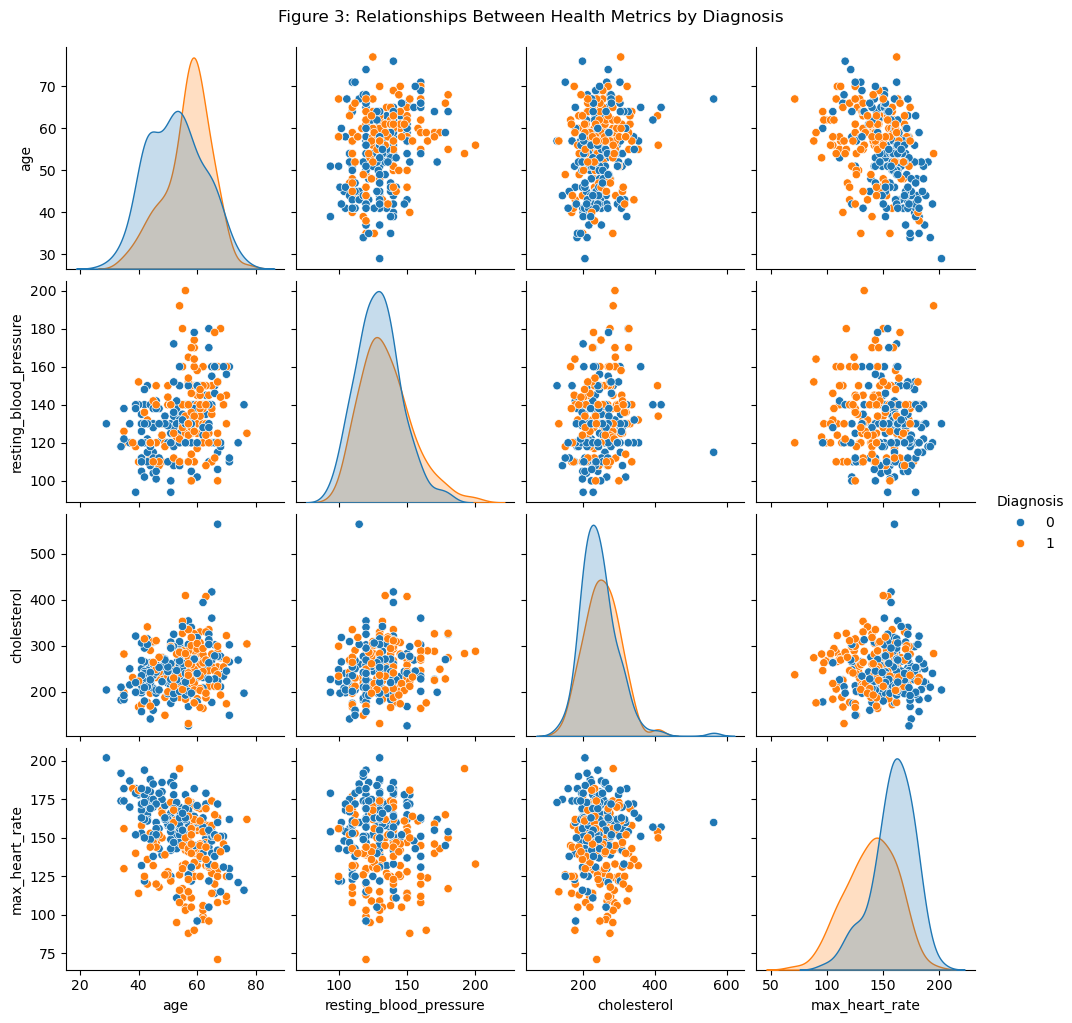

In [30]:
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Figure 2: Correlation Between Key Health Indicators')
plt.show()


# Pair plot to observe relationships between selected features
pairplot = sns.pairplot(
    df[['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate', 'diagnosis']],
    hue='diagnosis'
)
pairplot.fig.suptitle('Figure 3: Relationships Between Health Metrics by Diagnosis', y=1.02)
pairplot._legend.set_bbox_to_anchor((1, 0.5))
pairplot._legend.set_title('Diagnosis')
plt.show()

### EDA Results

To better understand the dataset and the relationships between the features and the target variable (diagnosis), we created several visualizations. These allowed us to identify patterns, correlations, and key features that could inform the modelling process.

In the processed data, Classes 1, 2, and 3 were combined into a single category, resulting in two main classes: Class 0 (no or mild disease) and Class 1 (moderate to severe disease). The distribution of these two classes is balanced, with nearly equal representation of patients in each. This balance is beneficial for modelling, as it reduces the risk of bias toward one class and allows the model to learn effectively from both categories.

To identify features that might help predict heart disease severity, we examined the distributions and relationships of the continuous predictors. The correlation heatmap showed that st_depression, ca, thal, and max_heart_rate had the strongest relationships with diagnosis, suggesting that these features are likely to be the most valuable. Pairwise plots provided more insights , showing clear trends such as lower max_heart_rate and higher st_depression values being associated with Class 1. In contrast, features like cholesterol and fasting_blood_sugar showed little separation between the two classes, indicating they may be less predictive on their own.

Overall, st_depression and max_heart_rate emerge as the most important features for predicting heart disease severity, while features like cholesterol may play a more limited role in the model.  The distribution of the target variable shows that the data is well-balanced between the two classes. Class 0 and Class 1 have nearly equal representation in the dataset. The balanced distribution of the two classes ensures the model will have a fair representation of both disease and non-disease cases, helping improve its performance.

## Methods & Results

In [31]:
import pandas as pd
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler
)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import ConfusionMatrixDisplay 
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

### Feature Encoding and Transformation

In [32]:
#splitting the features 

numeric_features = [
    "age", 
    "resting_blood_pressure", 
    "fasting_blood_sugar", 
    "cholesterol", 
    "max_heart_rate", 
    "st_depression", 
    "sex"
]
categorical_features = [
    "chest_pain_type", 
    "rest_ecg", 
    "exercise_induced_angina", 
    "slope", 
    "num_of_vessels", 
    "thalassemia"
]

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop="if_binary", handle_unknown="ignore")

# Create Column transformer
preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (categorical_transformer, categorical_features)
)

preprocessor


ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['age', 'resting_blood_pressure',
                                  'fasting_blood_sugar', 'cholesterol',
                                  'max_heart_rate', 'st_depression', 'sex']),
                                ('onehotencoder',
                                 OneHotEncoder(drop='if_binary',
                                               handle_unknown='ignore'),
                                 ['chest_pain_type', 'rest_ecg',
                                  'exercise_induced_angina', 'slope',
                                  'num_of_vessels', 'thalassemia'])])

In [33]:
#Split the train and test dataset
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [34]:
#apply the preprocessing pipeline to transform the train dataset
preprocessor.verbose_feature_names_out = False

X_train_enc = pd.DataFrame(preprocessor.fit_transform(X_train), columns= preprocessor.get_feature_names_out())

X_train_enc

,age,resting_blood_pressure,fasting_blood_sugar,cholesterol,max_heart_rate,st_depression,sex,chest_pain_type_asymptomatic,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,...,slope_downsloping,slope_flat,slope_upsloping,num_of_vessels_0.0,num_of_vessels_1.0,num_of_vessels_2.0,num_of_vessels_3.0,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,1.429458,1.519207,-0.403635,0.707663,-1.724876,0.375999,0.661438,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-1.383259,-0.642139,-0.403635,0.874948,0.565533,-0.901327,0.661438,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.754406,0.870803,-0.403635,-0.835080,0.523118,-0.901327,0.661438,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.766985,1.303073,-0.403635,-0.054415,-0.240352,-0.901327,0.661438,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.529389,1.735342,2.477485,-1.336935,-2.488345,-0.049777,0.661438,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,1.204441,0.978871,-0.403635,-0.426160,-1.470386,-0.049777,-1.511858,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
203,1.204441,1.519207,-0.403635,2.083119,0.098968,-0.220087,-1.511858,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
204,-0.145663,0.330467,-0.403635,-0.258875,0.480703,-0.901327,-1.511858,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
205,-0.033155,0.168366,2.477485,1.042233,0.904853,-0.901327,-1.511858,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
X_train_enc.columns

Index(['age', 'resting_blood_pressure', 'fasting_blood_sugar', 'cholesterol',
       'max_heart_rate', 'st_depression', 'sex',
       'chest_pain_type_asymptomatic', 'chest_pain_type_atypical angina',
       'chest_pain_type_non-anginal pain', 'chest_pain_type_typical angina',
       'rest_ecg_ST-T wave abnormality',
       'rest_ecg_left ventricular hypertrophy', 'rest_ecg_normal',
       'exercise_induced_angina_yes', 'slope_downsloping', 'slope_flat',
       'slope_upsloping', 'num_of_vessels_0.0', 'num_of_vessels_1.0',
       'num_of_vessels_2.0', 'num_of_vessels_3.0', 'thalassemia_fixed defect',
       'thalassemia_normal', 'thalassemia_reversable defect'],
      dtype='object')

In [36]:
scoring = {
    "accuracy": 'accuracy',
    'precision': make_scorer(precision_score, pos_label=True),
    'recall': make_scorer(recall_score, pos_label=True),
    'f1': make_scorer(f1_score, pos_label=True),

}  

## Classification Analysis

### Decision Tree Classifier

In [37]:
# Create a pipeline with the preprocessor and a Decision Tree Classifier

decision_tree = make_pipeline(preprocessor, DecisionTreeClassifier(random_state = 123))

decision_tree_cv = cross_validate(decision_tree, X_train, y_train, scoring=scoring, cv=5, return_train_score=True)

decision_tree_cv_results = pd.DataFrame(decision_tree_cv).agg(['mean', 'std']).round(3).T

# Display the results
decision_tree_cv_results

,mean,std
fit_time,0.011,0.004
score_time,0.012,0.002
test_accuracy,0.677,0.123
train_accuracy,1.000,0.000
test_precision,0.659,0.111
train_precision,1.000,0.000
test_recall,0.650,0.200
train_recall,1.000,0.000
test_f1,0.651,0.153
train_f1,1.000,0.000


In [38]:
# Fitting the model

decision_tree.fit(X_train, y_train)

decision_tree_result = decision_tree.predict(X_test)

In [39]:
# Confusion Matrix for the model

confusion_matrix(y_test,decision_tree_result)

array([[37, 16],
       [ 6, 31]])

### Decision Tree Model's Results

In [40]:
# Build Classification Report for Decision Tree Model

decision_tree_report = classification_report(y_test, decision_tree_result, output_dict=True)

decision_tree_report_df = pd.DataFrame(decision_tree_report).transpose()

decision_tree_report_filtered = decision_tree_report_df.loc[['0', '1', 'accuracy'], ['precision', 'recall', 'f1-score']]

decision_tree_report_filtered

,precision,recall,f1-score
0,0.860465,0.698113,0.770833
1,0.659574,0.837838,0.738095
accuracy,0.755556,0.755556,0.755556


### Logistic Regression

In [41]:
# Create a pipeline with the preprocessor and a Logistic Regression Model

cross_val_results = {}

logreg = make_pipeline(preprocessor, LogisticRegression(random_state = 123, max_iter = 1000))

cross_val_results['logreg'] = pd.DataFrame(cross_validate(logreg, X_train, y_train, scoring = scoring, return_train_score = True)).agg(['mean', 'std']).round(3).T

cross_val_results['logreg'] 

,mean,std
fit_time,0.013,0.004
score_time,0.010,0.001
test_accuracy,0.841,0.068
train_accuracy,0.890,0.011
test_precision,0.850,0.092
train_precision,0.912,0.015
test_recall,0.820,0.057
train_recall,0.855,0.029
test_f1,0.834,0.068
train_f1,0.882,0.014


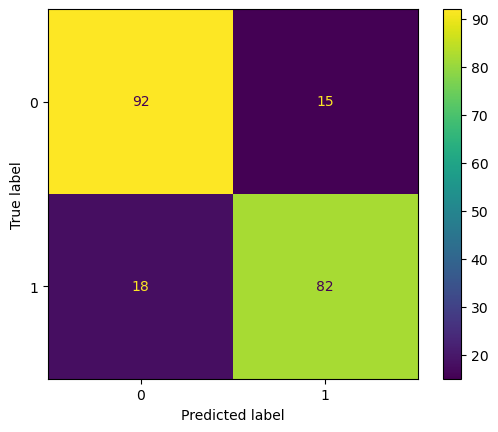

In [42]:
# Confusion Matrix of Logistic Regression Model

confmat_logreg = ConfusionMatrixDisplay.from_predictions(
    y_train,  # true class labels
    cross_val_predict(logreg, X_train, y_train),  # predicted class labels
)

In [43]:
# Fit the Logistic Regression Model

logreg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['age',
                                                   'resting_blood_pressure',
                                                   'fasting_blood_sugar',
                                                   'cholesterol',
                                                   'max_heart_rate',
                                                   'st_depression', 'sex']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'),
                                                  ['chest_pain_type',
                                                   'rest_ecg',
                                                   'exercise_induced_angina',
                                                   'slope', 'num_of_vessels',
                                                   'thalassemia'])],
                                   verbose_feature_names_out=False)),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, random_state=123))])

#### Analyzing the Coefficients of Logistic Regression 

In [44]:
logreg_model = logreg.named_steps['logisticregression']

In [45]:
# Extract the features after the column transformer

feature_names = logreg.named_steps['columntransformer'].get_feature_names_out()

coefficients = pd.DataFrame(logreg_model.coef_.ravel(), index=feature_names, columns=['Coefficient'])

coefficients.sort_values(by='Coefficient', inplace=True, ascending=False)

In [46]:
# Extract and Order the features based on coefficient values

coefficients = pd.DataFrame({
    "Feature": feature_names,  
    "Coefficient": logreg_model.coef_.ravel()
})

coefficients = coefficients.sort_values(by="Coefficient", ascending=False)

coefficients.style.background_gradient(cmap="coolwarm", subset=["Coefficient"]).set_caption("Table 1: Logistic Regression Coefficients")

,Feature,Coefficient
7,chest_pain_type_asymptomatic,1.242617
20,num_of_vessels_2.0,0.936761
24,thalassemia_reversable defect,0.908607
16,slope_flat,0.789179
6,sex,0.467793
1,resting_blood_pressure,0.464303
21,num_of_vessels_3.0,0.416970
5,st_depression,0.400422
12,rest_ecg_left ventricular hypertrophy,0.268959
14,exercise_induced_angina_yes,0.210783


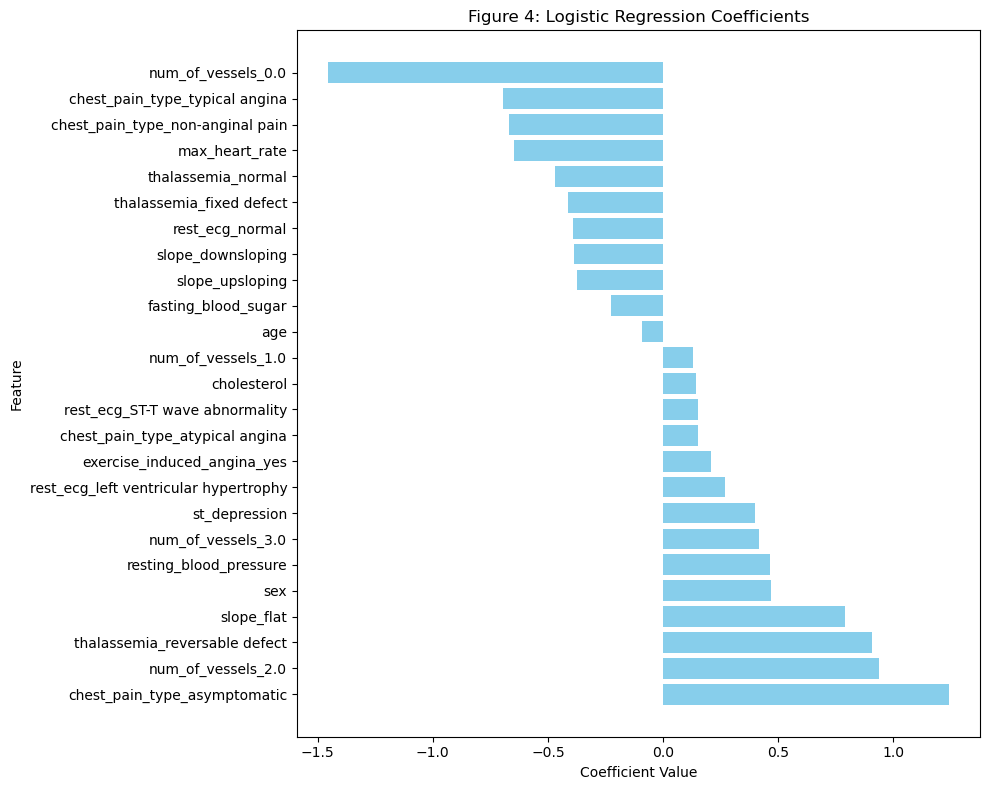

In [47]:
# Plot the figure for Coefficients Values

plt.figure(figsize=(10, 8))
plt.barh(coefficients["Feature"], coefficients["Coefficient"], color='skyblue')
plt.title("Figure 4: Logistic Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [48]:
# Predict the test data using Logistic Regression Model

pred = logreg.predict(X_test)

In [49]:
# Confusion Matrix for Test data

confusion_matrix(y_test,pred)

array([[45,  8],
       [ 8, 29]])

### Logistic Regressions Model's Results

In [50]:
# Evaluate the results using Logistic Regression Model

loges_report = classification_report(y_test, pred, output_dict=True)

loges_report_df = pd.DataFrame(loges_report).transpose()

loges_report_filtered = loges_report_df.loc[['0', '1', 'accuracy'], ['precision', 'recall', 'f1-score']]

loges_report_filtered

,precision,recall,f1-score
0,0.849057,0.849057,0.849057
1,0.783784,0.783784,0.783784
accuracy,0.822222,0.822222,0.822222


## Discussion

### Summary of Findings: 

In this project, logistic regression and decision tree models were applied to classify individuals based on their likelihood of having heart disease. Both models successfully predicted heart disease diagnoses, with logistic regression outperforming decision trees in terms of interpretability and performance metrics like precision and recall. Logistic regression also provided actionable insights into feature importance.


### Unexpected Findings: 

While many features, such as chest pain type and maximum heart rate, had high predictive power, some features demonstrated lower importance than expected. For instance, fasting blood sugar, a commonly discussed indicator in cardiovascular health, showed limited contribution in our models. This finding suggests that some clinical attributes may have less direct influence on heart disease risk than traditionally assumed or that their impact might be context-dependent.


### Future Work: 

There are several ways to improve upon the findings of this project:

1. Improving the Model: Trying advanced models like Random Forest or Gradient Boosting could help make predictions more accurate and reliable. These models work well with complex data by combining multiple decision-making techniques.

2. Exploring New Features: Adding more details to the data, like lifestyle habits (e.g., smoking, exercise) or family history, could make the model better at predicting heart disease.

3. Making the Model Explainable: Using tools like SHAP or LIME can help us understand why the model makes certain predictions. This is especially important for gaining trust in a healthcare setting.

4. Testing in the Real World: It would be valuable to test the model with real patient data in a clinical environment to see how it performs outside the lab.

5. Dealing with Uneven Data: If the dataset has many more people without heart disease than with it, methods like balancing the data or focusing on the underrepresented group can make the model fairer and more accurate.

## References

Heart disease. UCI Machine Learning Repository. (n.d.). https://archive.ics.uci.edu/dataset/45/heart+disease 

Detrano, R.C., Jánosi, A., Steinbrunn, W., Pfisterer, M.E., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. The American journal of cardiology, 64 5, 304-10 .

Van Rossum, G., & Drake, F. (2009). Python 3 Reference Manual. CreateSpace.

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., Cournapeau, D., Brucher, M., Perrot, M., & Duchesnay, E. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825–2830.

Deshmukh, H. (2020, July 16). Heart disease UCI Diagnosis & Prediction. Medium. https://towardsdatascience.com/heart-disease-uci-diagnosis-prediction-b1943ee835a7 

Fahadrehman. (2024, April 28). Heart disease prediction using 9 models. Kaggle. https://www.kaggle.com/code/fahadrehman07/heart-disease-prediction-using-9-models#Evaluation-of-Models